<a href="https://colab.research.google.com/github/karinaguerra/tech_challenge_fase_1/blob/main/Tech_Challenge_Fase_1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#O Problema

Imagine agora, que você vai atuar como Expert em Data Analytics em uma
empresa que exporta vinhos do Brasil para o mundo todo.

Sua área é recém-criada dentro da empresa, e você será responsável pelos
relatórios iniciais a serem apresentados em uma reunião de investidores e
acionistas, explicando a quantidade de vinhos exportados e os fatores ex-
ternos que podem vir a surgir e que interferem nas análises:

1. Dados climáticos.
2. Dados demográficos.
3. Dados econômicos.
4. Dados de avaliações de vinhos.

O Head de Dados pediu para que você construísse uma tabela contendo as
seguintes informações:

* País de origem (Brasil).
* País de destino.
* Quantidade em litros de vinho exportado (utilize: 1KG = 1L).
* valor em US$

Seu objetivo é dizer o montante de venda de exportaçáo nos últimos 15 anos, separando análise por país e trazendo quais as prospecçóes futuras e possíveis ações para urna melhoria nas exportações. Construa gráficos atraentes e que passem a ideia central para que os acionistas e investidores possam seguir em frente com suas ações.

> DICA:
> Para construir uma boa análise, utilize várias bases do mesmo site!
> Outro ponto interessante, é utilizar os dados externos citados acima para
> enriquecer ainda mais a mensagem que você quer passar.

# IMPORTANTE
Não esqueça de que este é entregável obrigatório!
Se atente para o prazo de entrega até o final da fase!

# Importação de Bibliotecas

In [ ]:
# Imports
import pandas as pd
import seaborn as sns
import matplotlib.ticker as ticker
import matplotlib.pyplot as plt

# Importação de Base da dados

In [ ]:
# Base de dados sem tratamento

# Produção
producao = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/producao/Producao.csv', sep=';',thousands='.', decimal=',')

#Comercialização
comercio = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/comercializacao/Comercio.csv',sep=';',thousands='.', decimal=',')

#Processamento
processaamericana = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/processamento/ProcessaAmericanas.csv',sep=';',thousands='.', decimal=',')
processamesa = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/processamento/ProcessaMesa.csv',sep=';',thousands='.', decimal=',')
processavinifera = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/processamento/ProcessaViniferas.csv',sep=';',thousands='.', decimal=',')

#Exportação
expespumante = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpEspumantes.csv',sep=';',thousands='.', decimal=',')
expsuco = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpSuco.csv',sep=';',thousands='.', decimal=',')
expuva = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpUva.csv',sep=';',thousands='.', decimal=',')
expvinho = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpVinho.csv',sep=';',thousands='.', decimal=',')

#Importação
impespumante = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpEspumantes.csv',sep=';',thousands='.', decimal=',')
impfrescas = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpFrescas.csv',sep=';',thousands='.', decimal=',')
imppassas = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpPassas.csv',sep=';',thousands='.', decimal=',')
impsuco = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpSuco.csv',sep=';',thousands='.', decimal=',')
impvinho = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/importacao/ImpVinhos.csv',sep=';',thousands='.', decimal=',')


# Exportação de uvas frescas

Na base original não tem a linha anos e Quantidade (Kg) e Valor (US$)

In [ ]:
expuva_a = pd.read_csv('/content/drive/MyDrive/PosTech_Analise_de_dados/FASE1/tech_challenge_1/dados/exportacao/ExpUva_ajustado.csv',sep=';',thousands='.', decimal=',')

In [ ]:
expuva_a.head(3)

,index,Países,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
0,1,Africa do Sul,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,30
1,2,"Alemanha, República Democrática",0,0,135,103,0,0,0,0,...,3277187,6532957,2384112,5161080,3353831,6730502,2870420,5833592,1863097,3480290
2,3,Angola,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,33,75,145


# Tratamento incial do dados

## Retirar a primeira coluna (index)

In [ ]:
#Exportação
expuva_a = pd.DataFrame(expuva_a)
expuva_a.drop('index', axis = 1, inplace = True)

In [ ]:
expuva_a.head(3)

,Países,1970 Quantidade,1970 Valor,1971 Quantidade,1971 Valor,1972 Quantidade,1972 Valor,1973 Quantidade,1973 Valor,1974 Quantidade,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
0,Africa do Sul,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,30
1,"Alemanha, República Democrática",0,0,135,103,0,0,0,0,3840,...,3277187,6532957,2384112,5161080,3353831,6730502,2870420,5833592,1863097,3480290
2,Angola,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,15,33,75,145


## Transformando a coluna 'Países' em índice (index)

In [ ]:
# Transformando a coluna 'Países' em índice (index)
expuva_a.set_index('Países', inplace=True)

# Filtro de 2004 a 2019 (15 anos)

In [ ]:
# Selecionando colunas de 2004 a 2019
expuva_filtro = expuva_a.loc[:, '2004 Quantidade':'2019 Valor']

expuva_filtro.head(3)

,2004 Quantidade,2004 Valor,2005 Quantidade,2005 Valor,2006 Quantidade,2006 Valor,2007 Quantidade,2007 Valor,2008 Quantidade,2008 Valor,...,2015 Quantidade,2015 Valor,2016 Quantidade,2016 Valor,2017 Quantidade,2017 Valor,2018 Quantidade,2018 Valor,2019 Quantidade,2019 Valor
Países,,,,,,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,8,30
"Alemanha, República Democrática",838673,994204,889813,1081566,818198,1224605,2256707,5191457,1297991,2693071,...,3277187,6532957,2384112,5161080,3353831,6730502,2870420,5833592,1863097,3480290
Angola,82055,127430,76618,125958,0,0,0,0,33860,90396,...,0,0,0,0,0,0,15,33,75,145


# Separa as em data frame de Valor e quantidade

## Valores (R$)

In [ ]:
# Filtro para pegar somente os Valores
df_valor_expuva = expuva_filtro.filter(like='Valor')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_valor_expuva.columns:
    if 'Valor' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_valor_expuva = df_valor_expuva.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_valor_expuva.head(5)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Países,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,32130,0,0,0,0,0,0,0,0,0,30
"Alemanha, República Democrática",994204,1081566,1224605,5191457,2693071,1475757,1437429,2430345,2064845,5316776,3524291,6532957,5161080,6730502,5833592,3480290
Angola,127430,125958,0,0,90396,110058,0,0,2492,0,0,0,0,0,33,145
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,164,580
Arabia Saudita,0,0,0,0,103666,0,0,30600,0,0,0,140760,0,0,28615,271231


<Axes: >

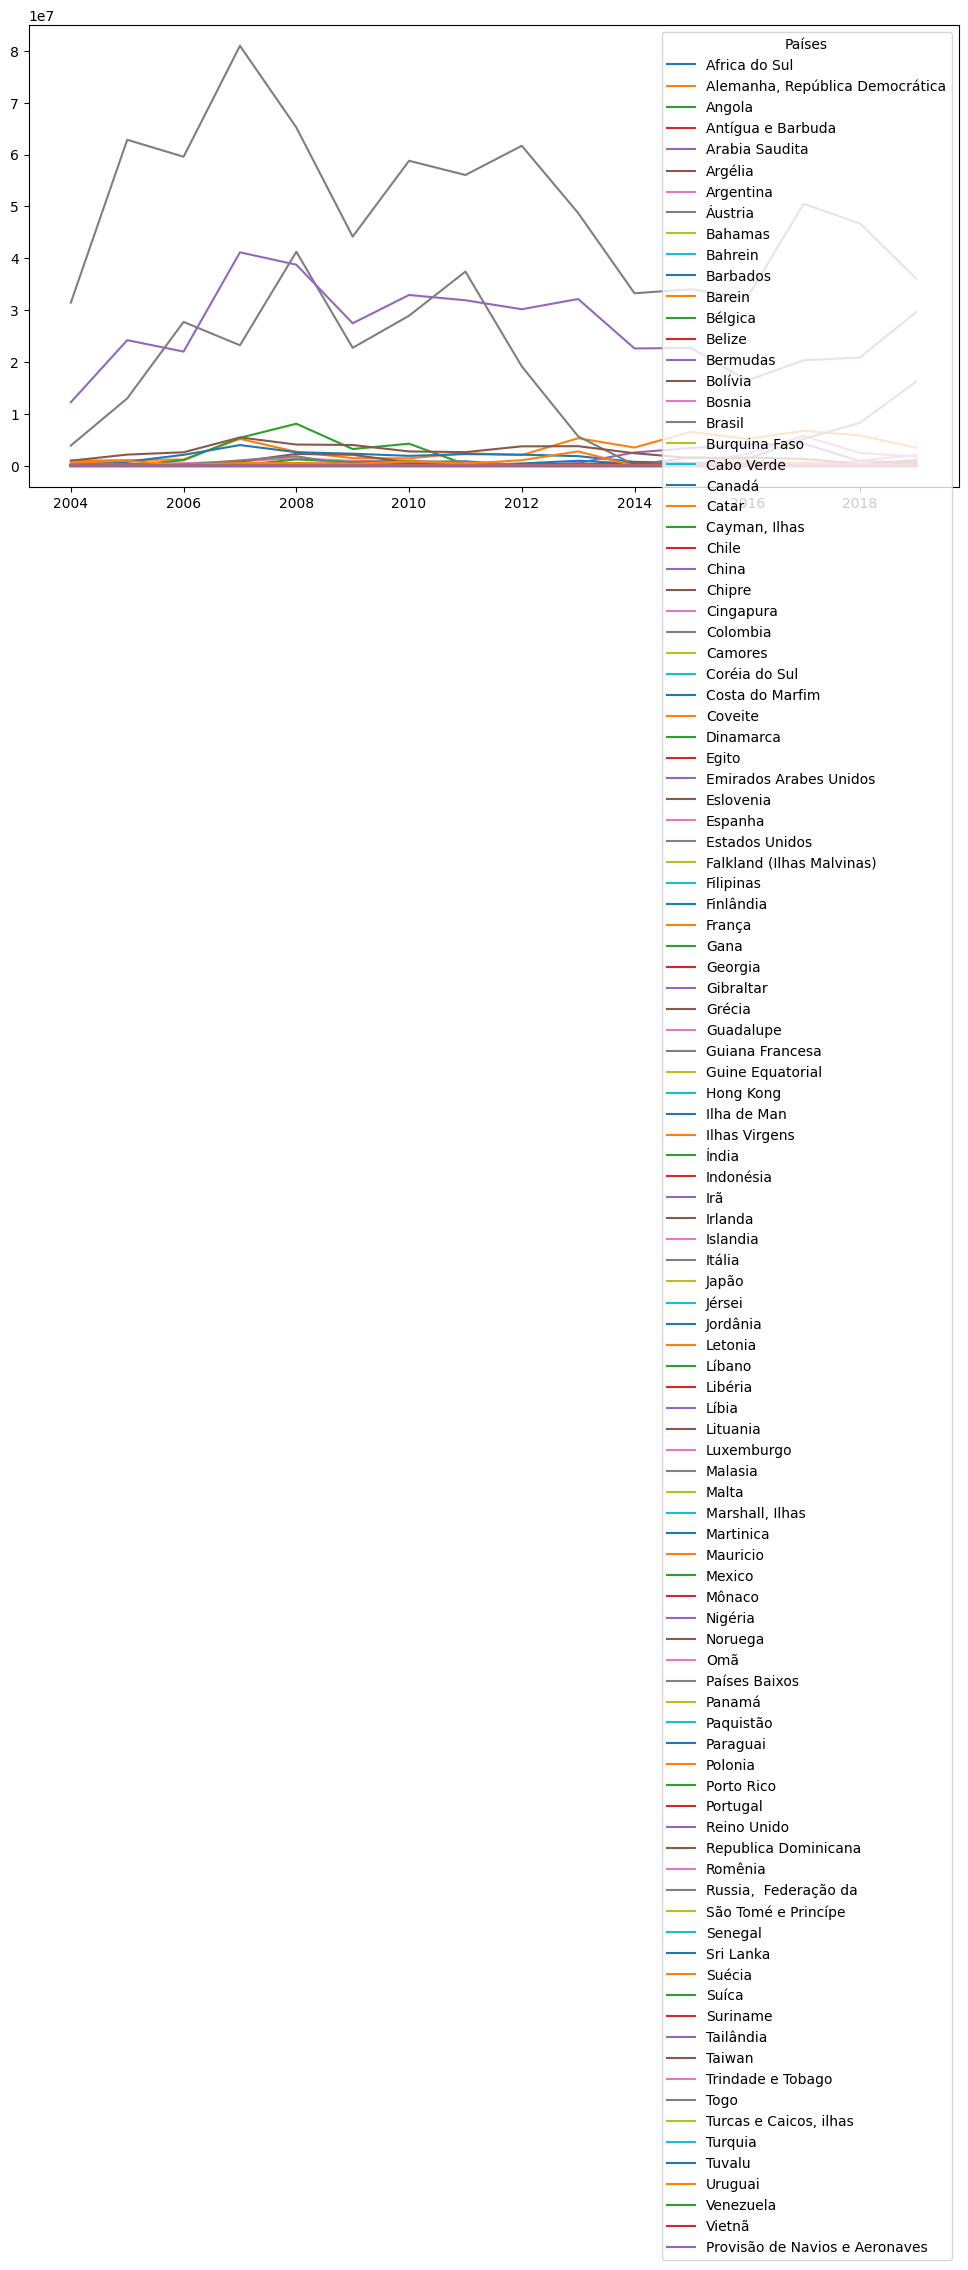

In [ ]:
df_valor_expuva.T.plot(figsize=(12,6))

## Quantidades (Kg)

In [ ]:
# df Quantidade
df_quantidade_expuva = expuva_filtro.filter(like='Quantidade')

# Função para renomeando colunas para incluir apenas o ano
for coluna in df_quantidade_expuva.columns:
    if 'Quantidade' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        df_quantidade_expuva = df_quantidade_expuva.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
df_quantidade_expuva.head(5)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Países,,,,,,,,,,,,,,,,
Africa do Sul,0,0,0,0,0,15300,0,0,0,0,0,0,0,0,0,8
"Alemanha, República Democrática",838673,889813,818198,2256707,1297991,759594,713942,1167243,1021075,2457655,1649514,3277187,2384112,3353831,2870420,1863097
Angola,82055,76618,0,0,33860,29700,0,0,350,0,0,0,0,0,15,75
Antígua e Barbuda,0,0,0,0,0,0,0,0,0,0,0,0,0,0,65,190
Arabia Saudita,0,0,0,0,47328,0,0,15300,0,0,0,61200,0,0,14725,167731


<Axes: >

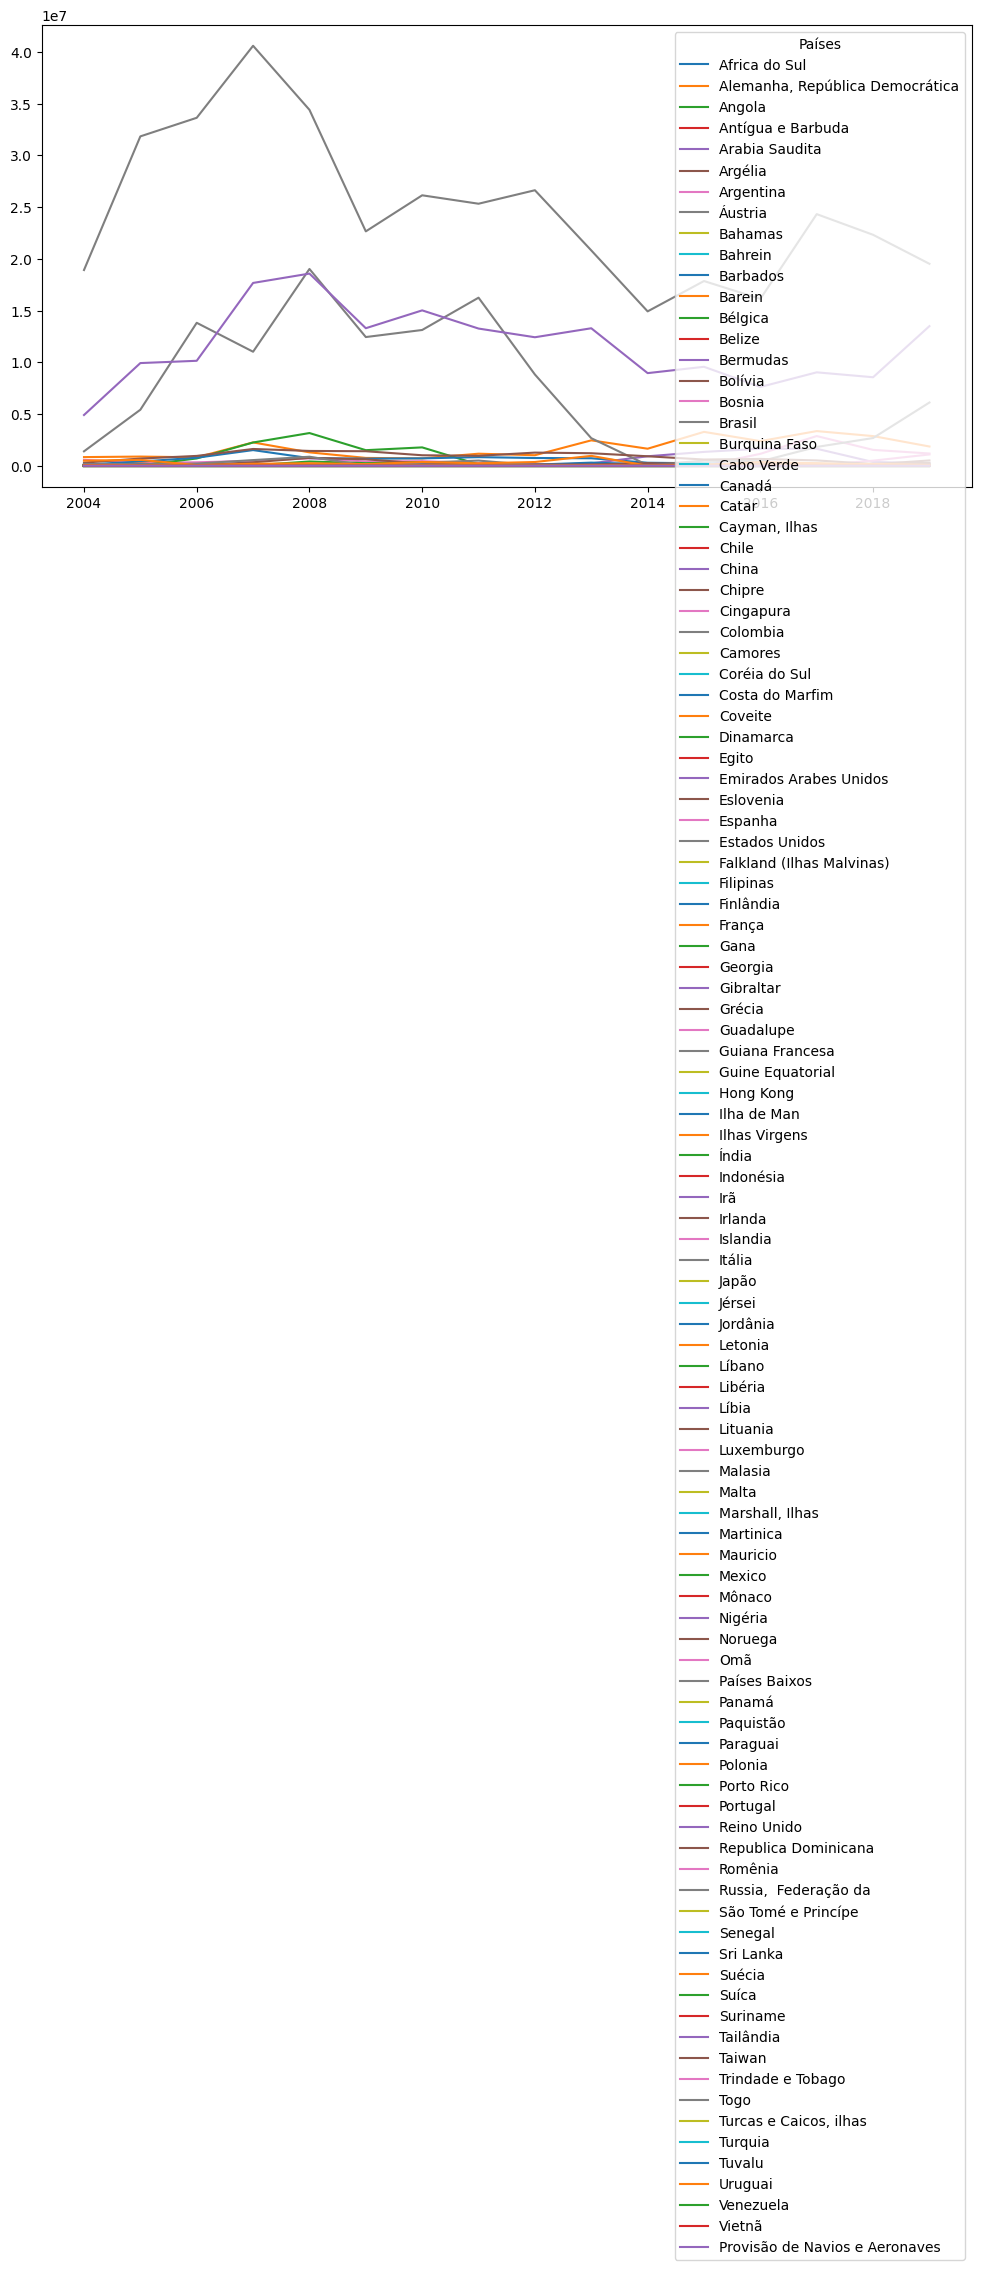

In [ ]:
df_quantidade_expuva.T.plot(figsize=(12,6))

A exportação de Uvas frescas começou so tem dados em 2019

# Produção

In [ ]:
producao.head(3)

,index,p_Produto,Produto,1970 Quantidade (L),1971 Quantidade (L),1972 Quantidade (L),1973 Quantidade (L),1974 Quantidade (L),1975 Quantidade (L),1976 Quantidade (L),...,2010 Quantidade (L),2011 Quantidade (L),2012 Quantidade (L),2013 Quantidade (L),2014 Quantidade (L),2015 Quantidade (L),2016 Quantidade (L),2017 Quantidade (L),2018 Quantidade (L),2019 Quantidade (L)
0,1,VINHO DE MESA,VINHO DE MESA,217208604,154264651,146953297,116710345,193875345,177401209,144565438,...,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737
1,2,vm_Tinto,Tinto,174224052,121133369,118180926,88589019,146544484,144274134,118360170,...,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115
2,3,vm_Branco,Branco,748400,1160500,1812367,243900,4138768,1441507,1871473,...,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828


In [ ]:
#Produção retirar as duas primeras colunas
producao_filtro = pd.DataFrame(producao)
producao_filtro.drop(['index', 'p_Produto'], axis = 1, inplace = True)

In [ ]:
# Transformando a coluna 'Produto' em índice (index)
producao_filtro.set_index('Produto', inplace=True)

In [ ]:
# Selecionando colunas de 2004 a 2019
expuva_anos = producao_filtro.loc[:, '2004 Quantidade (L)':'2019 Quantidade (L)']

expuva_anos.head(3)

,2004 Quantidade (L),2005 Quantidade (L),2006 Quantidade (L),2007 Quantidade (L),2008 Quantidade (L),2009 Quantidade (L),2010 Quantidade (L),2011 Quantidade (L),2012 Quantidade (L),2013 Quantidade (L),2014 Quantidade (L),2015 Quantidade (L),2016 Quantidade (L),2017 Quantidade (L),2018 Quantidade (L),2019 Quantidade (L)
Produto,,,,,,,,,,,,,,,,
VINHO DE MESA,313962284,226080432,185100887,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737
Tinto,254172425,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115
Branco,51719967,39212146,31738390,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828


In [ ]:
# Filtro para pegar somente os Valores
producao_vinho = expuva_anos.filter(like='Quantidade (L)')

# Função para renomeando colunas para incluir apenas o ano
for coluna in producao_vinho.columns:
    if 'Quantidade (L)' in coluna:
        ano = coluna.split()[0]  # Extrai o ano da coluna original
        novo_nome = f'{ano}'
        producao_vinho = producao_vinho.rename(columns={coluna: novo_nome})

# Exibindo DataFrame após a renomeação
producao_vinho.head(5)

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Produto,,,,,,,,,,,,,,,,
VINHO DE MESA,313962284,226080432,185100887,275287908,287506811,205418206,195267980,257840749,212777037,196904222,196173123,210308560,86319015,255015187,218375636,144629737
Tinto,254172425,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115
Branco,51719967,39212146,31738390,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828
Rosado,8069892,6169620,3809942,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794
VINHO FINO DE MESA (VINÍFERA),42902608,45453898,32168977,43176484,47334501,39900568,24805713,47598471,45200730,45782530,38464314,37148982,18070626,44537870,38707220,37615422


##VINHO DE MESA

In [ ]:
producao_vinho_mesa = producao_vinho.iloc[1:4, :]
producao_vinho_mesa

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Produto,,,,,,,,,,,,,,,,
Tinto,254172425,180698666,149552555,228156220,241057928,164143454,157290088,210113358,175875432,163111797,157776363,169811472,75279191,1365957,188270142,121045115
Branco,51719967,39212146,31738390,42118552,42942053,39211278,35408083,46007504,34938249,32066403,37438069,39557250,10727099,217527985,29229970,22032828
Rosado,8069892,6169620,3809942,5013136,3506830,2063474,2569809,1719887,1963356,1726022,958691,939838,312725,36121245,875524,1551794


## inverter a linha para coluna

In [ ]:
producao_vinho_mesa_t = producao_vinho_mesa.T
#producao_vinho_mesa_t.rename(columns={"VINHO DE MESA": "total"}, inplace=True) # trocar o nome (não usado)

In [ ]:
producao_vinho_mesa_t.tail()

Produto,Tinto,Branco,Rosado
2015,169811472,39557250,939838
2016,75279191,10727099,312725
2017,1365957,217527985,36121245
2018,188270142,29229970,875524
2019,121045115,22032828,1551794


## Apresentar o Index novamente, renomear as colunas

In [ ]:
producao_mesa = producao_vinho_mesa_t.reset_index().melt(id_vars=["index"], value_vars=producao_vinho_mesa_t.columns)
producao_mesa.columns = ["ano", "vinho_mesa", "quantidade"]
producao_mesa.head()

,ano,vinho_mesa,quantidade
0,2004,Tinto,254172425
1,2005,Tinto,180698666
2,2006,Tinto,149552555
3,2007,Tinto,228156220
4,2008,Tinto,241057928


<function matplotlib.pyplot.show(close=None, block=None)>

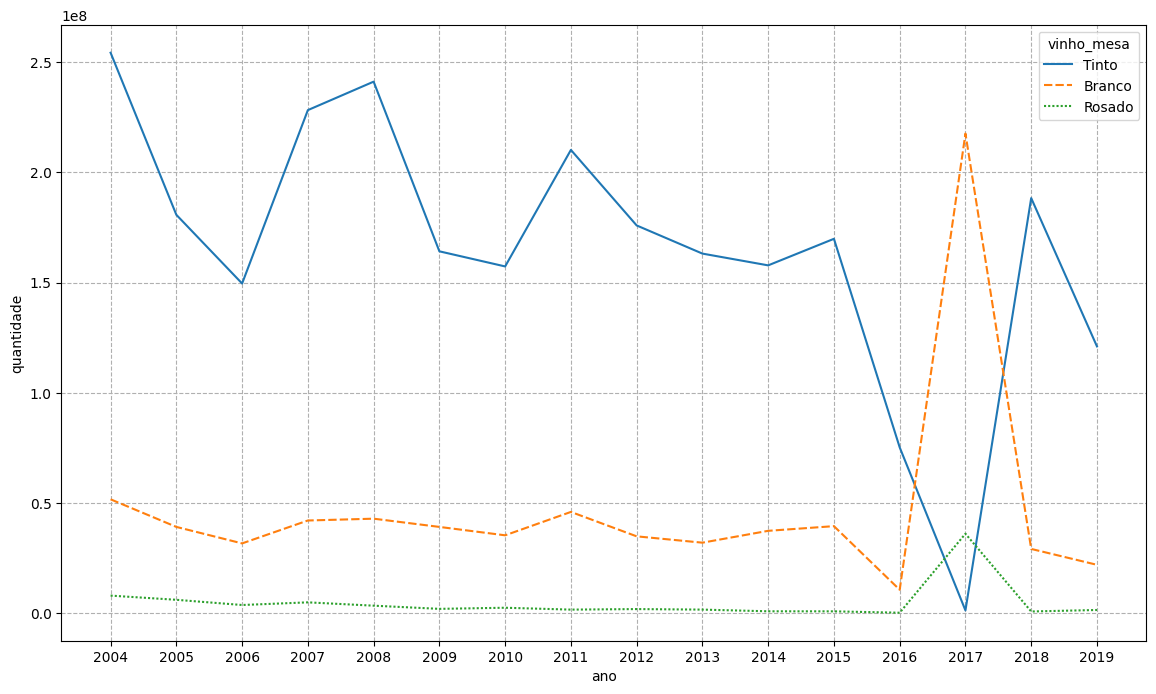

In [ ]:
plt.figure(figsize=(14,8))
#palettes = sns.color_palette("Paired")
axis = sns.lineplot(data=producao_mesa, x="ano", y="quantidade", hue="vinho_mesa", style="vinho_mesa") #, palette = palettes)
plt.grid(linestyle="--")
plt.show

##VINHO FINO DE MESA (VINÍFERA)

In [ ]:
producao_vinho_fino = producao_vinho.iloc[5:8, :]

In [ ]:
producao_vinho_fino

,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018,2019
Produto,,,,,,,,,,,,,,,,
Tinto,23062182,25409805,18868108,24786071,27583032,18209043,11401406,24104740,24027589,23156458,17208996,16745896,8774847,21442212,19118254,17389377
Branco,19803647,20012363,13249969,17598428,18812571,21366975,13013027,22739426,20647238,21906349,20054804,19561966,8705066,21928400,18297257,18193055
Rosado,36779,31730,50900,791985,938898,324550,391280,754305,525903,719723,1200514,841120,590713,1167258,1291709,2032990


In [ ]:
producao_vinho_fino_t = producao_vinho_fino.T

In [ ]:
producao_fino = producao_vinho_fino_t.reset_index().melt(id_vars=["index"], value_vars=producao_vinho_fino_t.columns)
producao_fino.columns = ["ano", "vinho_mesa", "quantidade"]
producao_fino.head()

,ano,vinho_mesa,quantidade
0,2004,Tinto,23062182
1,2005,Tinto,25409805
2,2006,Tinto,18868108
3,2007,Tinto,24786071
4,2008,Tinto,27583032


<function matplotlib.pyplot.show(close=None, block=None)>

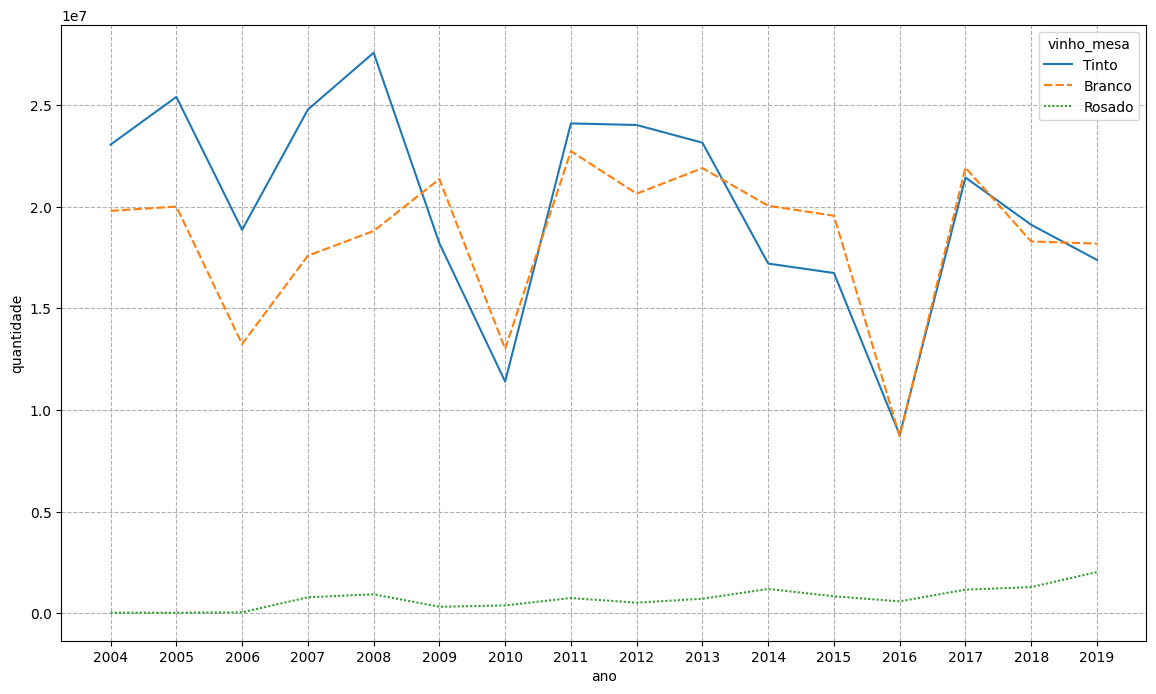

In [ ]:
plt.figure(figsize=(14,8))
#palettes = sns.color_palette("Paired")
axis = sns.lineplot(data=producao_fino, x="ano", y="quantidade", hue="vinho_mesa", style="vinho_mesa") #, palette = palettes)
plt.grid(linestyle="--")
plt.show

## Suco

In [ ]:
producao_suco = producao_vinho.iloc[9:13, :]

In [ ]:
producao_suco_t = producao_suco.T

In [ ]:
producao_suco_uva = producao_suco_t.reset_index().melt(id_vars=["index"], value_vars=producao_suco_t.columns)
producao_suco_uva.columns = ["ano", "produto", "quantidade"]
producao_suco_uva.head()

,ano,produto,quantidade
0,2004,Suco de uva integral,6222380
1,2005,Suco de uva integral,7103175
2,2006,Suco de uva integral,13946491
3,2007,Suco de uva integral,10147037
4,2008,Suco de uva integral,11817941


<function matplotlib.pyplot.show(close=None, block=None)>

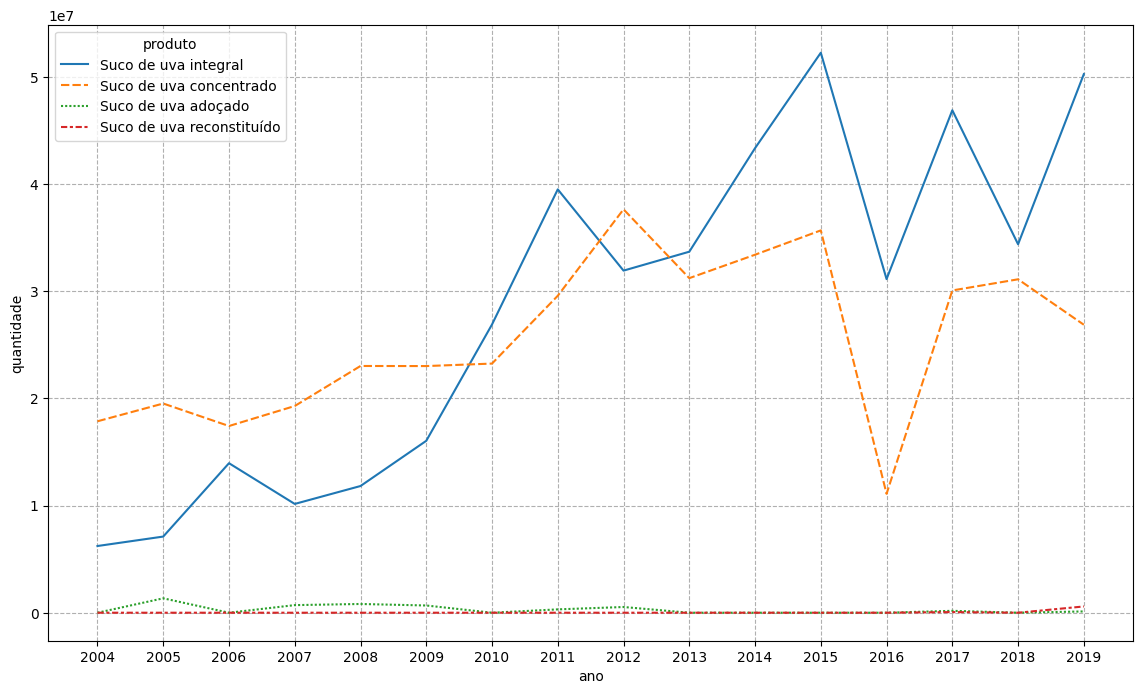

In [ ]:
plt.figure(figsize=(14,8))
#palettes = sns.color_palette("Paired")
axis = sns.lineplot(data=producao_suco_uva, x="ano", y="quantidade", hue="produto", style="produto") #, palette = palettes)
plt.grid(linestyle="--")
plt.show

## DERIVADOS

In [ ]:
producao.tail(1)

,index,p_Produto,Produto,1970 Quantidade (L),1971 Quantidade (L),1972 Quantidade (L),1973 Quantidade (L),1974 Quantidade (L),1975 Quantidade (L),1976 Quantidade (L),...,2010 Quantidade (L),2011 Quantidade (L),2012 Quantidade (L),2013 Quantidade (L),2014 Quantidade (L),2015 Quantidade (L),2016 Quantidade (L),2017 Quantidade (L),2018 Quantidade (L),2019 Quantidade (L)
44,45,de_Outros derivados,Outros derivados,0,0,0,0,0,0,0,...,0,5600,0,0,0,0,0,0,0,0


In [ ]:
producao_derivados = producao_vinho.iloc[14:45, :]

In [ ]:
producao_derivados_t = producao_derivados.T

In [ ]:
producao_derivado = producao_derivados_t.reset_index().melt(id_vars=["index"], value_vars=producao_derivados_t.columns)
producao_derivado.columns = ["ano", "produto", "quantidade"]
producao_derivado.head()

,ano,produto,quantidade
0,2004,Espumante,3999
1,2005,Espumante,1920
2,2006,Espumante,26600
3,2007,Espumante,0
4,2008,Espumante,88690


<ipython-input-61-4f4c7f02d24a>:3: UserWarning: 
The palette list has fewer values (12) than needed (31) and will cycle, which may produce an uninterpretable plot.
  axis = sns.lineplot(data=producao_derivado, x="ano", y="quantidade", hue="produto", style="produto", palette = palettes)


<function matplotlib.pyplot.show(close=None, block=None)>

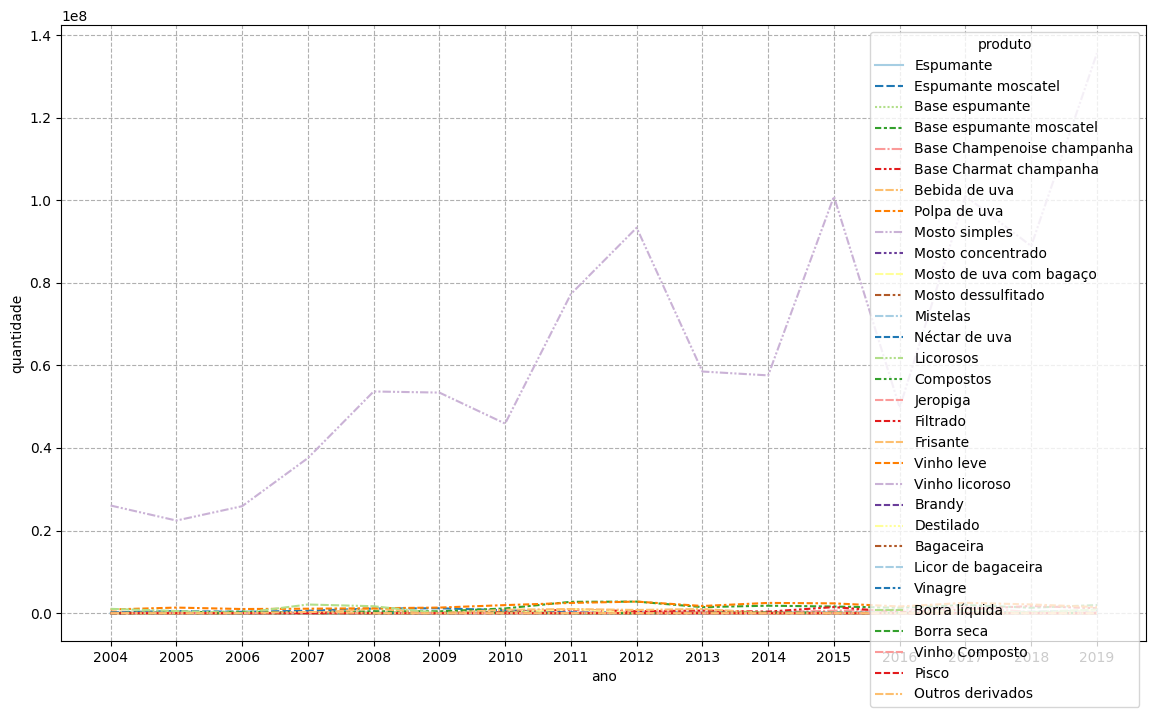

In [ ]:
plt.figure(figsize=(14,8))
palettes = sns.color_palette("Paired")
axis = sns.lineplot(data=producao_derivado, x="ano", y="quantidade", hue="produto", style="produto", palette = palettes)
plt.grid(linestyle="--")
plt.show